In [2]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv(r'C:\Users\user\DS-SF-41\data\rossmann.csv', skipinitialspace=True, low_memory=False)


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [22]:
import matplotlib

%matplotlib inline

In [19]:


store1 = df[df['Store'] == 1]

In [23]:
sales = store1[store1['Open']==1]

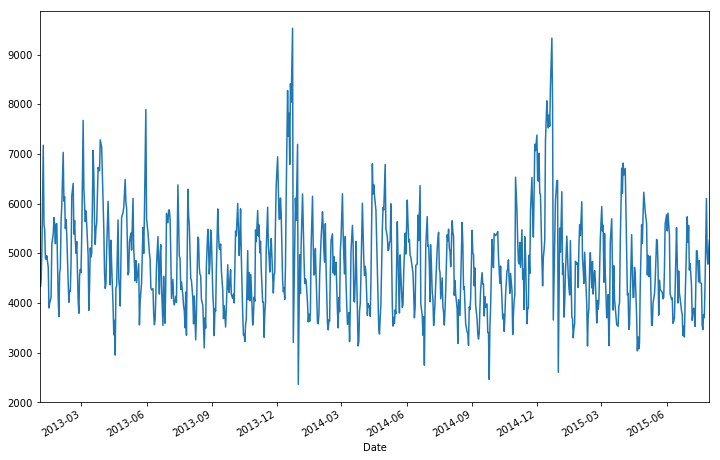

In [27]:
sales['Sales'].plot(figsize=(12, 8))

In [35]:
store1[store1['Open'] == 1]['Sales'].resample('D').mean().autocorr(lag=1)

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [34]:
store1[store1['Open'] == 1]['DayOfWeek'].value_counts().sort_index()

1    128
2    134
3    132
4    124
5    129
6    134
Name: DayOfWeek, dtype: int64

In [47]:
#pd.rolling_mean(store1[['Sales']], window=4, center=True, freq='D')

In [40]:
from pandas.plotting import autocorrelation_plot

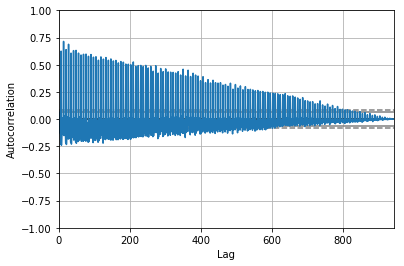

In [44]:
autocorrelation_plot(store1['Sales'])

In [45]:
from statsmodels.graphics.tsaplots import plot_acf

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


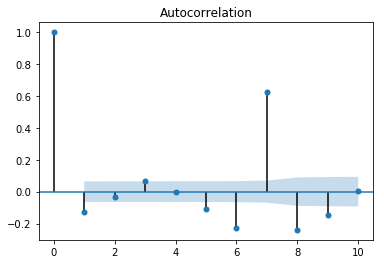

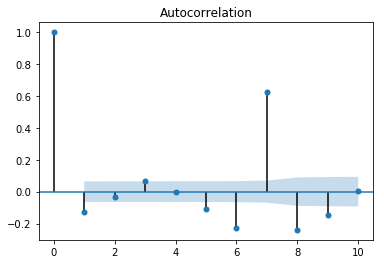

In [46]:
plot_acf(store1['Sales'], lags=10)

In [50]:
from statsmodels.tsa.arima_model import ARMA

store1_sales = store1[['Sales']].astype('float')

model = ARMA(store1_sales, (1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(1, 0)   Log Likelihood               -8495.734
Method:                       css-mle   S.D. of innovations           1997.953
Date:                Mon, 05 Feb 2018   AIC                          16997.467
Time:                        20:55:36   BIC                          17012.011
Sample:                    07-31-2015   HQIC                         17003.011
                         - 01-01-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3945.7049     57.744     68.331      0.000    3832.530    4058.880
ar.L1.Sales    -0.1275      0.032     -3.938      0.000      -0.191      -0.064
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.8444           +0.0000j            7.8444            0.5000
-----------------------------------------------------------------------------
"""